In [35]:
import pandas as pd

In [36]:
#Reading the data
df=pd.read_csv('data/Gemstone.csv')
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
30094,30094,1.24,Ideal,J,VS2,62.0,57.0,6.87,6.91,4.28,5816
30095,30095,1.01,Premium,F,VS2,61.3,59.0,6.51,6.46,3.97,6334
30096,30096,2.02,Very Good,D,SI2,63.1,59.0,8.05,7.97,5.03,12765
30097,30097,0.61,Premium,F,VS2,62.3,58.0,5.46,5.43,3.38,1970


In [37]:
#check the missing values with respect to columns
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [38]:
#check the info of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30099 entries, 0 to 30098
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       30099 non-null  int64  
 1   carat    30099 non-null  float64
 2   cut      30099 non-null  object 
 3   color    30099 non-null  object 
 4   clarity  30099 non-null  object 
 5   depth    30099 non-null  float64
 6   table    30099 non-null  float64
 7   x        30099 non-null  float64
 8   y        30099 non-null  float64
 9   z        30099 non-null  float64
 10  price    30099 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.5+ MB


In [39]:
#From the above observations we can see that cut,color,clarity columns belong to categorical
#we have to convert this categorical type columns to numerical so we can do dataencoding

In [40]:
#id column consists of unique value for every record, so drop it
#In prediction models with the help of unique values for every row we can't able to predict any value
df=df.drop(labels=['id'],axis=1) 

In [41]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [42]:
#check for duplicated records
df.duplicated().sum()

0

In [43]:
#There are zero duplicate records as we see from above
#If we find duplicate records and if we have to remove the duplicate records then remove with the 
# method df.drop_duplicates() 

In [44]:
#Segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns",numerical_columns)
print("categorical columns",categorical_columns)

Numerical columns Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
categorical columns Index(['cut', 'color', 'clarity'], dtype='object')


In [45]:
#Get the information about count of records,how many unique values,top and freq type 
df[categorical_columns].describe()

,cut,color,clarity
count,30099,30099,30099
unique,5,7,8
top,Ideal,G,SI1
freq,14439,6910,8221


In [46]:
#freq-->from the above we can see for 'cut' column freq value is 14439 means out of 5 unique values
#one unique value is repeated for 14439 times and same happens in other columns

In [47]:
#print the unique values of each columns
#df.nunique prints no.of unique values have in that column 
df['cut'].nunique()

5

In [48]:
#value_counts prints the each type with how many times it is repeated
df['cut'].value_counts()

cut
Ideal        14439
Premium       7785
Very Good     5757
Good          1792
Fair           326
Name: count, dtype: int64

In [49]:
#unique() prints what are the unique present in that column
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [50]:
df['color'].value_counts()

color
G    6910
E    5471
F    5368
H    4758
D    3863
I    2771
J     958
Name: count, dtype: int64

In [51]:
df['clarity'].value_counts()

clarity
SI1     8221
VS2     7504
VS1     4737
SI2     4725
VVS2    2475
VVS1    1675
IF       677
I1        85
Name: count, dtype: int64

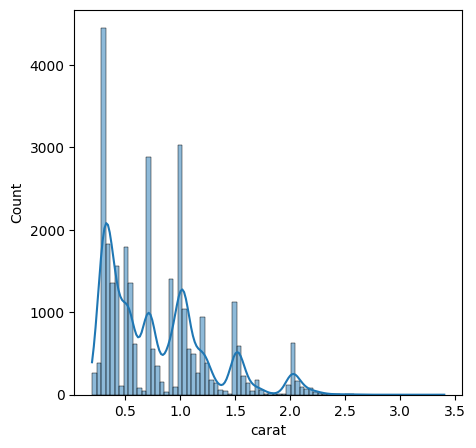

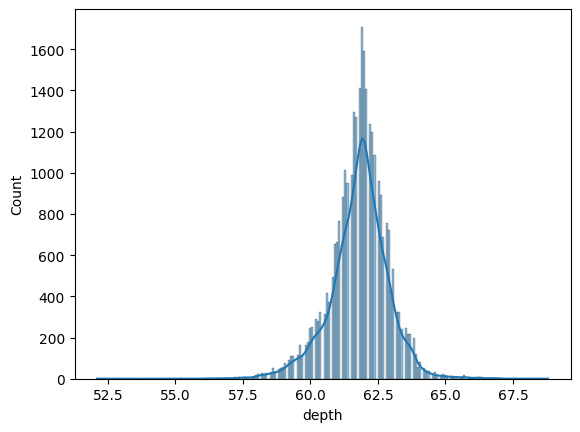

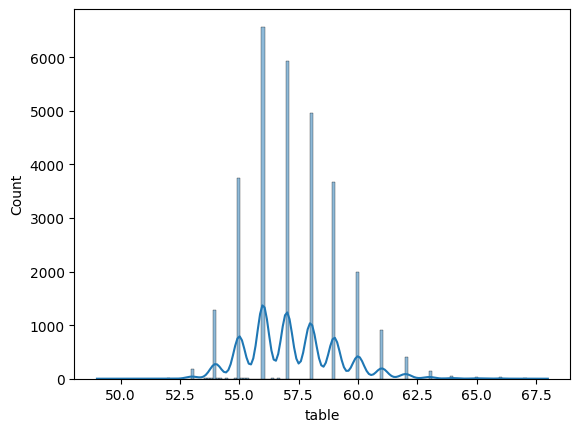

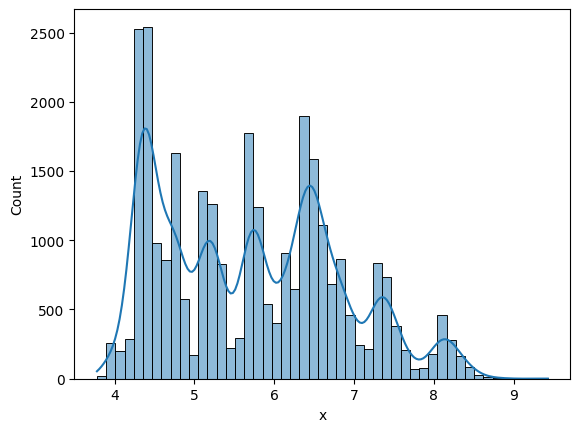

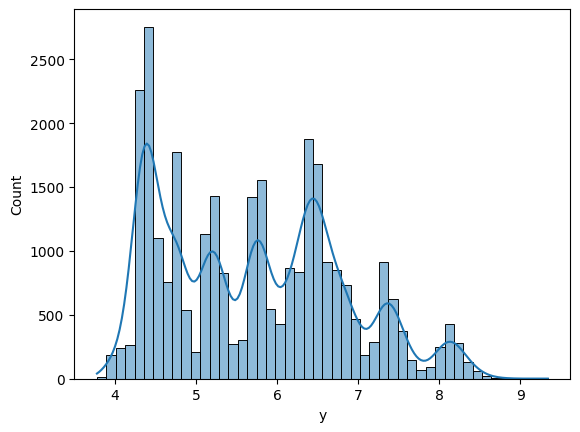

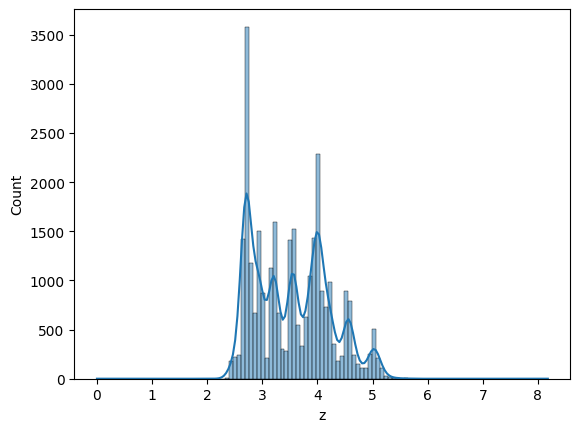

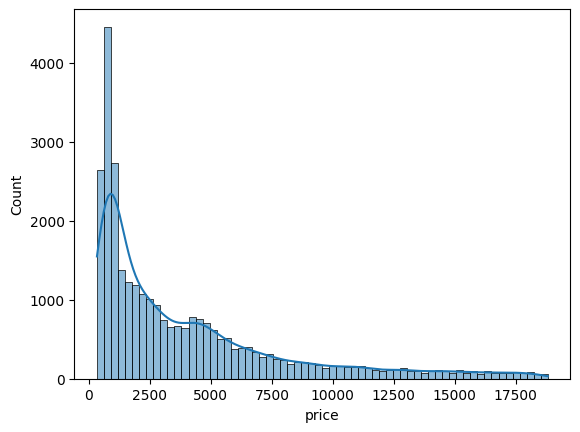

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: >

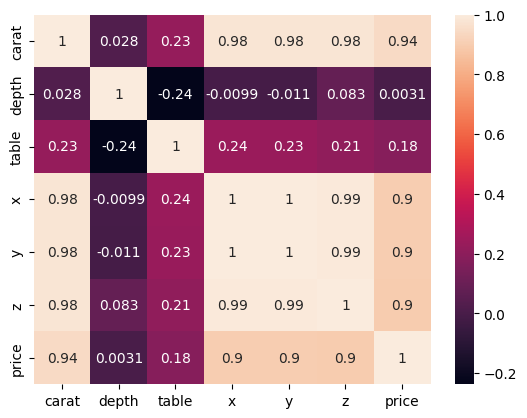

In [53]:
#corelation
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [54]:
#In the above i mentioned numeric_only=True because heatmap works only for numerical datatype only and 
# it won't work for categorical type and gives error. 

#If we find there is high corelation then we can drop that columns it won't impact much on the result
#if there is any change it doesn't reflect on the result


In [55]:
#For multicolinearity listen from 1:02:00 on 8th april video and write downin notebook
# we have to drop x,y,z columns as they are highly corelated to carat which is 98%,98%,97%
#Instead of using x,y,z three columns we can use single column 'carat' for result
# We have to remove highly corelated independent features,
# If there is corelation between independent and dependent features then there is no need to remove the columns
#   

In [56]:
df.drop(labels=['x','y','z'],axis=1)

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453
...,...,...,...,...,...,...,...
30094,1.24,Ideal,J,VS2,62.0,57.0,5816
30095,1.01,Premium,F,VS2,61.3,59.0,6334
30096,2.02,Very Good,D,SI2,63.1,59.0,12765
30097,0.61,Premium,F,VS2,62.3,58.0,1970


In [57]:
#we can drop the x,y,z columns later
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [58]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [59]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [60]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [61]:
#open diamond grading chart and then rank the above unique values with numbers
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map={"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}
color_map={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [62]:
#Now replace the variables with numbers as we mapped above for 3 columns
#We can replace the values with 'replace' method
df['cut'].replace(cut_map)

0        4
1        3
2        5
3        5
4        4
        ..
30094    5
30095    4
30096    3
30097    4
30098    5
Name: cut, Length: 30099, dtype: int64

In [63]:
#We can also replace by using 'map' method also
df['cut'].map(cut_map)

0        4
1        3
2        5
3        5
4        4
        ..
30094    5
30095    4
30096    3
30097    4
30098    5
Name: cut, Length: 30099, dtype: int64

In [64]:
df['cut']=df['cut'].replace(cut_map)
df['clarity']=df['clarity'].replace(clarity_map)
df['color']=df['color'].map(color_map)

In [65]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
